## Material de Estudo

In [27]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
%matplotlib inline

In [17]:
# Carregar Arquivo
COLUMNS = ['Hora', 'user%', 'system', 'idle']
datasetCPU = pd.read_csv('cpumetricas.txt',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 4, 8],
                   names=COLUMNS
                   )


count    1683.000000
mean       86.181004
std         4.142882
min        52.610000
25%        85.285000
50%        86.990000
75%        88.485000
max        92.440000
Name: idle, dtype: float64

In [18]:
,
                   converters={'timeStamp': convertDateTime,
                               'elapsed': converttosecond,
                               'responseCode': converttoint
                              }

IndentationError: unexpected indent (<ipython-input-18-2e846f7a8522>, line 2)

In [21]:
datasetCPU.tail(10)

,Hora,user%,system,idle
1673,10:20:01,9.89,0.0,86.96
1674,10:30:02,8.02,0.0,87.96
1675,10:40:01,8.89,0.0,88.57
1676,10:50:01,7.91,0.0,88.98
1677,11:00:03,7.74,0.0,87.77
1678,11:10:01,10.68,0.0,86.67
1679,11:20:01,9.73,0.0,87.28
1680,11:30:01,8.64,0.0,87.00
1681,11:40:01,9.07,0.0,88.33
1682,11:50:02,7.96,0.0,89.16


In [26]:
print(type(datasetCPU['system'][0]))

<class 'numpy.float64'>


In [29]:
# Carregar Arquivo
def convertHora(val):
    return datetime.strptime(val, '%H:%M:%S') 

COLUMNS = ['Hora', 'user', 'system', 'idle']
datasetCPU = pd.read_csv('cpumetricas.txt',
                   sep='\s+',
                   engine='python', 
                   na_values='-', 
                   header=None ,
                   usecols=[0, 3, 4, 8],
                   names=COLUMNS,
                   converters={'Hora': convertHora
                            
                              }      
                   )

datasetCPU = datasetCPU.set_index('Hora')
datasetCPU.head()




,user,system,idle
Hora,,,
1900-01-01 12:10:01,11.29,0.0,78.76
1900-01-01 12:20:03,14.08,0.0,66.28
1900-01-01 12:30:01,9.99,0.0,79.48
1900-01-01 12:40:01,8.15,0.0,88.37
1900-01-01 12:50:01,6.73,0.0,89.55


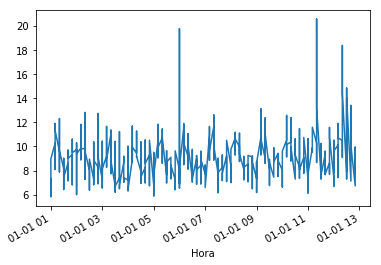

In [30]:
datasetCPU['user'].plot()

In [32]:
np.percentile(datasetCPU['idle'], 0.90)


68.41726

In [44]:
# Carregar Arquivo
def convertHora(val):
    return datetime.strptime(val, '%H:%M') 

def convertToSecunds(val):
    return int(val)/1000

COLUMNS = ['timeStamp','elapsed','label','responseCode']
datasetJmeter = pd.read_csv('resultadoBateria3.jtl',
                   sep=',',
                   engine='python', 
                   na_values='-', 
                   header=0 ,
                   usecols=[0, 1, 2, 3],
                   names=COLUMNS,
                   converters={'timeStamp': convertHora,
                                'elapsed': convertToSecunds
                              }      
                   )

datasetJmeter = datasetJmeter.set_index('timeStamp')
datasetJmeter.head()

,elapsed,label,responseCode
timeStamp,,,
1900-01-01 01:57:00,0.121,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.606,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.969,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.246,4.2 - /vivostorefront/contrate,200
1900-01-01 01:57:00,0.309,4.2 - /vivostorefront/contrate,200


In [45]:
#Filtros

filtroTransations = datasetJmeter.loc[(datasetJmeter['label'].str.contains('\[T\]') == False )
                                     & (datasetJmeter['responseCode']==200)]

filtroTransations.head()

,elapsed,label,responseCode
timeStamp,,,
1900-01-01 01:57:00,0.121,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.606,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.969,4.1 - /planos/controle/,200
1900-01-01 01:57:00,0.246,4.2 - /vivostorefront/contrate,200
1900-01-01 01:57:00,0.309,4.2 - /vivostorefront/contrate,200


In [38]:
print(type(filtroTransations['responseCode'][0]))

<class 'numpy.int64'>


In [47]:
#GrupBy

gp1 = filtroTransations.groupby(['timeStamp', 'label']).agg({
        'label': ['count'],
        'elapsed': ['mean']
    })
gp1.head()

label  \
                                                                      count   
timeStamp           label                                                     
1900-01-01 01:57:00 4.1 - /planos/controle/                              21   
                    4.11 - /vivostorefront/contrate/alta/enderecoform    76   
                    4.12 - /vivostorefront/contrate/alta/checkout        74   
                    4.2 - /vivostorefront/contrate                       84   
                    4.3 - /vivostorefront/contrate/alta/validatecpf      83   

                                                                        elapsed  
                                                                           mean  
timeStamp           label                                                        
1900-01-01 01:57:00 4.1 - /planos/controle/                            0.116476  
                    4.11 - /vivostorefront/contrate/alta/enderecoform  0.963132  
                    4.12 - /vivostorefront/contrate/alta/checkout      1.072878  
                    4.2 - /vivostorefront/contrate                     0.399071  
                    4.3 - /vivostorefront/contrate/alta/validatecpf    2.580036

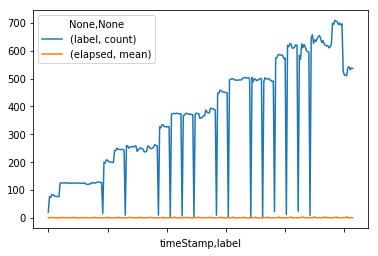

In [48]:
gp1.plot()

In [59]:
def insereTag(val):
    result = ''
    if (re.search("4\.2", val)):
        result = 'Planos - Por CPF massa aleatoria'
    else:
        result = 'outros'
    return result

datasetJmeter['TAG'] = [insereTag(val) for val in datasetJmeter['label'].values]
datasetJmeter.head(20)

,elapsed,label,responseCode,TAG
timeStamp,,,,
1900-01-01 01:57:00,0.121,4.1 - /planos/controle/,200,outros
1900-01-01 01:57:00,0.606,4.1 - /planos/controle/,200,outros
1900-01-01 01:57:00,0.969,4.1 - /planos/controle/,200,outros
1900-01-01 01:57:00,0.246,4.2 - /vivostorefront/contrate,200,Planos - Por CPF massa aleatoria
1900-01-01 01:57:00,0.309,4.2 - /vivostorefront/contrate,200,Planos - Por CPF massa aleatoria
1900-01-01 01:57:00,0.046,4.1 - /planos/controle/,200,outros
1900-01-01 01:57:00,0.406,4.2 - /vivostorefront/contrate,200,Planos - Por CPF massa aleatoria
1900-01-01 01:57:00,0.202,4.2 - /vivostorefront/contrate,200,Planos - Por CPF massa aleatoria
1900-01-01 01:57:00,0.041,4.1 - /planos/controle/,200,outros


In [61]:


gp2 = datasetJmeter.groupby(['timeStamp', 'TAG']).agg({
        'label': ['count'],
        'elapsed': ['mean']
    })
gp2.head()

label   elapsed
                                                     count      mean
timeStamp           TAG                                             
1900-01-01 01:57:00 Planos - Por CPF massa aleatoria   168  3.455107
                    outros                             641  0.755661
1900-01-01 01:58:00 Planos - Por CPF massa aleatoria   250  3.148820
                    outros                            1003  0.730623
1900-01-01 01:59:00 Planos - Por CPF massa aleatoria   250  3.382560